# Visualize Results of Matching Runs from IND initial runs

## Import in data from runs

In [1]:
import pandas as pd

In [2]:
data_df = pd.read_csv('ind_match_runs_initial.csv')

In [3]:
data_df['settings_file'].unique()

array(['settings_4', 'dedupe_extension/settings_IND_0',
       'dedupe_extension/settings_IND_1',
       'dedupe_extension/settings_IND_2',
       'dedupe_extension/settings_IND_3',
       'dedupe_extension/settings_IND_4'], dtype=object)

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [5]:
data_df['settings_num'] = encoder.fit_transform(data_df['settings_file'])

In [6]:
data_df

,run_id,completed,predicates,total_clusters,avg_cluster_size,biggest_cluster_size,biggest_cluster,total_donors,donor_type,total_run_time,donor_cluster_ratio,settings_file,settings_num
0,37,2020-12-02 12:15:42.277501,(SimplePredicate: (sameSevenCharStartPredicate...,18000,2.677111,365,michael accocella:81383,124476,IND,7886.498997,6.915333,settings_4,5
1,38,2020-12-02 15:00:02.200298,"(LevenshteinCanopyPredicate: (1, name), Simple...",2770,2.102527,9,joni yoswein:31166,65753,IND,10.045891,23.737545,dedupe_extension/settings_IND_0,0
2,39,2020-12-02 16:02:03.443525,"(LevenshteinCanopyPredicate: (2, name), Levens...",8129,2.171239,18,john lesueur:55874,123946,IND,3074.409347,15.247386,dedupe_extension/settings_IND_1,1
3,40,2020-12-02 16:38:33.124129,"(SimplePredicate: (commonTwoTokens, name), Sim...",2572,2.083981,7,joni yoswein:31013,65617,IND,1773.693557,25.512053,dedupe_extension/settings_IND_2,2
4,41,2020-12-02 17:34:53.254289,"(LevenshteinCanopyPredicate: (1, name), Simple...",6931,2.128553,8,allison lee:2724,124045,IND,3044.835579,17.897129,dedupe_extension/settings_IND_3,3
5,42,2020-12-02 18:38:49.656527,"(SimplePredicate: (doubleMetaphone, name), Sim...",8317,2.187087,16,andrew roffe:4015,123857,IND,2129.918230,14.892028,dedupe_extension/settings_IND_4,4
6,68,2020-12-03 08:34:04.345475,"(LevenshteinCanopyPredicate: (1, name), Simple...",7840,2.173342,14,brian meara:11775,123946,IND,20.700110,15.809439,dedupe_extension/settings_IND_0,0
7,69,2020-12-03 08:56:27.051927,"(LevenshteinCanopyPredicate: (2, name), Levens...",8112,2.170365,18,john lesueur:55874,123946,IND,1342.697703,15.279339,dedupe_extension/settings_IND_1,1
8,70,2020-12-03 08:58:09.78222,"(SimplePredicate: (commonTwoTokens, name), Sim...",7580,2.151319,10,andrew roffe:4038,123946,IND,102.718462,16.351715,dedupe_extension/settings_IND_2,2
9,71,2020-12-03 09:03:00.563206,"(LevenshteinCanopyPredicate: (1, name), Simple...",6864,2.144668,11,brian meara:11775,123946,IND,290.768066,18.057401,dedupe_extension/settings_IND_3,3


In [7]:
%matplotlib inline 
import matplotlib.pyplot as plt

In [8]:
data = {'size': data_df['total_donors'].values, 
       'cluster_ratio': data_df['donor_cluster_ratio'].values,
       'settings': data_df['settings_file'].values}

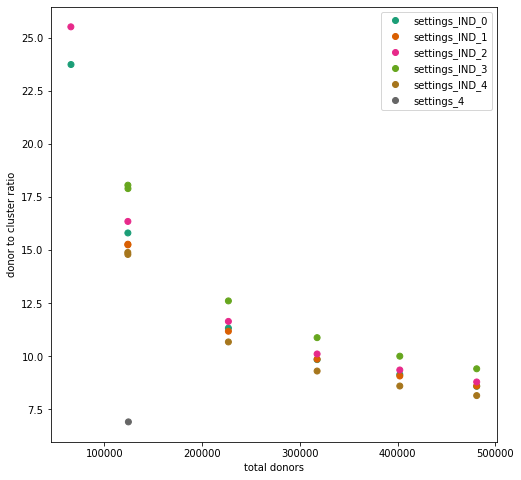

In [10]:
plt.figure(figsize=(8,8))
scatter = plt.scatter(data_df['total_donors'].values, data_df['donor_cluster_ratio'].values, c=data_df['settings_num'].values, cmap='Dark2')
settings = ['settings_IND_0','settings_IND_1','settings_IND_2','settings_IND_3','settings_IND_4','settings_4']
plt.xlabel('total donors')
plt.ylabel('donor to cluster ratio')
plt.legend(handles=scatter.legend_elements()[0],labels=settings)
plt.show()

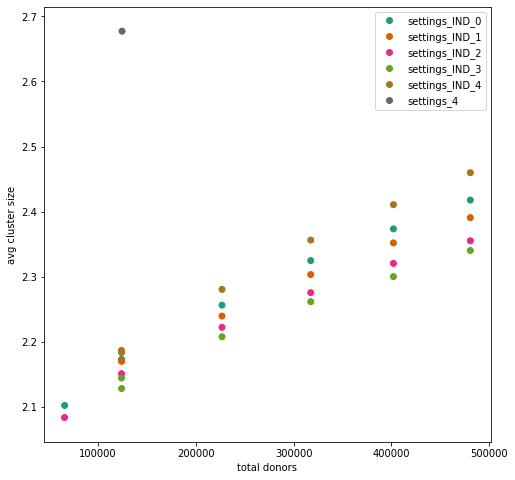

In [11]:
plt.figure(figsize=(8,8))
scatter = plt.scatter(data_df['total_donors'].values, data_df['avg_cluster_size'].values, c=data_df['settings_num'].values, cmap='Dark2')
plt.xlabel('total donors')
plt.ylabel('avg cluster size')
plt.legend(handles=scatter.legend_elements()[0],labels=settings)
plt.show()

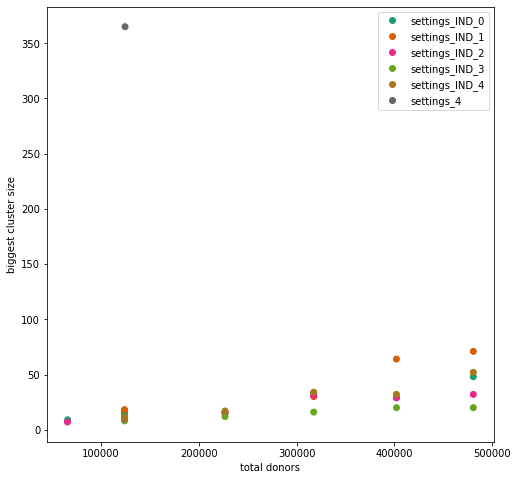

In [12]:
plt.figure(figsize=(8,8))
scatter = plt.scatter(data_df['total_donors'].values, data_df['biggest_cluster_size'].values, c=data_df['settings_num'].values, cmap='Dark2')
plt.xlabel('total donors')
plt.ylabel('biggest cluster size')
plt.legend(handles=scatter.legend_elements()[0],labels=settings)
plt.show()

In [22]:
files = ['dedupe_extension/settings_IND_0','dedupe_extension/settings_IND_1',
        'dedupe_extension/settings_IND_2','dedupe_extension/settings_IND_3','dedupe_extension/settings_IND_4']

In [23]:
ratio_sets = []
for file in files:
    data_cut = data_df[data_df['settings_file'] == file].sort_values('total_donors')
    ratio_sets.append([data_cut['total_donors'].values, data_cut['donor_cluster_ratio'].values, file])

In [24]:
ratio_sets

[[array([ 65753, 123946, 226790, 317552, 402157, 480824]),
  array([23.73754513, 15.80943878, 11.33043565,  9.84748969,  9.14554386,
          8.59135904]),
  'dedupe_extension/settings_IND_0'],
 [array([123946, 123946, 226790, 317552, 402157, 480824]),
  array([15.2473859 , 15.27933925, 11.18293886,  9.86645953,  9.07537292,
          8.60319562]),
  'dedupe_extension/settings_IND_1'],
 [array([ 65617, 123946, 226790, 317552, 402157, 480824]),
  array([25.51205288, 16.35171504, 11.64518614, 10.11215489,  9.35858233,
          8.79470296]),
  'dedupe_extension/settings_IND_2'],
 [array([123946, 124045, 226790, 317552, 402157, 480824]),
  array([18.05740093, 17.89712884, 12.61065391, 10.8810307 , 10.00813777,
          9.41536774]),
  'dedupe_extension/settings_IND_3'],
 [array([123857, 123946, 226790, 317552, 402157, 480824]),
  array([14.89202838, 14.79775549, 10.67900363,  9.30937234,  8.60357701,
          8.15342875]),
  'dedupe_extension/settings_IND_4']]

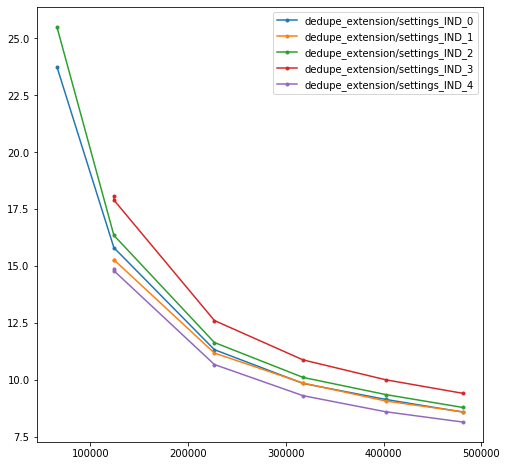

In [25]:
plt.figure(figsize=(8,8))
for s in ratio_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2])
plt.legend()

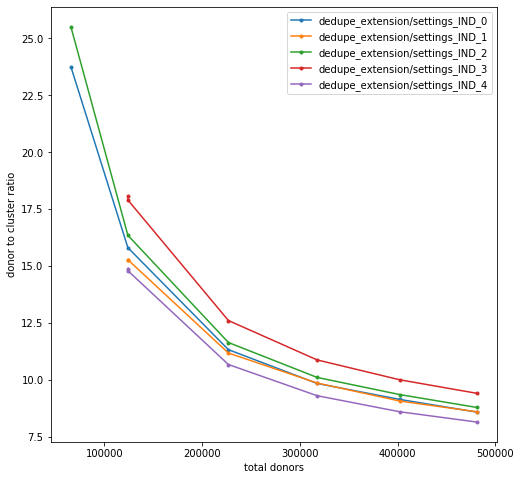

In [26]:
plt.figure(figsize=(8,8))
for s in ratio_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2])
plt.xlabel('total donors')
plt.ylabel('donor to cluster ratio')
plt.legend()

In [27]:
avg_size_sets = []
for file in files:
    data_cut = data_df[data_df['settings_file'] == file].sort_values('total_donors')
    avg_size_sets.append([data_cut['total_donors'].values, data_cut['avg_cluster_size'].values, file])

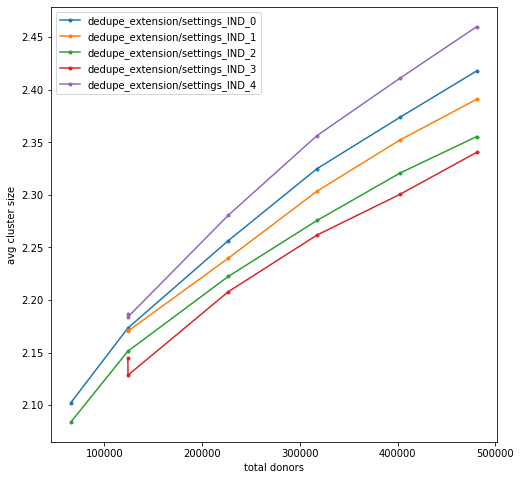

In [28]:
plt.figure(figsize=(8,8))
for s in avg_size_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2])
plt.xlabel('total donors')
plt.ylabel('avg cluster size')
plt.legend()

In [29]:
biggest_size_sets = []
for file in files:
    data_cut = data_df[data_df['settings_file'] == file].sort_values('total_donors')
    biggest_size_sets.append([data_cut['total_donors'].values, data_cut['biggest_cluster_size'].values, file])

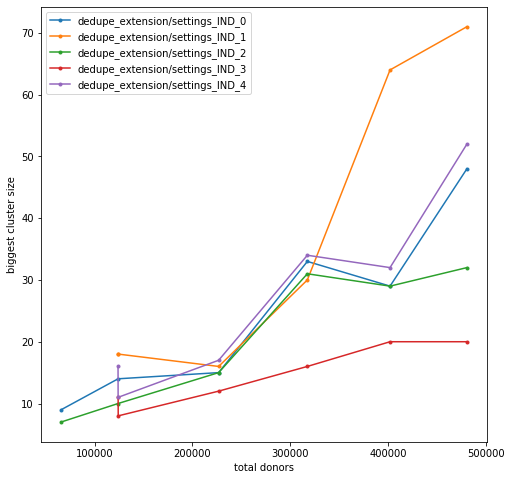

In [30]:
plt.figure(figsize=(8,8))
for s in biggest_size_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2])
plt.xlabel('total donors')
plt.ylabel('biggest cluster size')
plt.legend()

In [79]:
total_clusters_sets = []
for file in files:
    data_cut = data_df[data_df['settings_file'] == file].sort_values('total_donors')
    total_clusters_sets.append([data_cut['total_donors'].values, data_cut['total_clusters'].values, file])

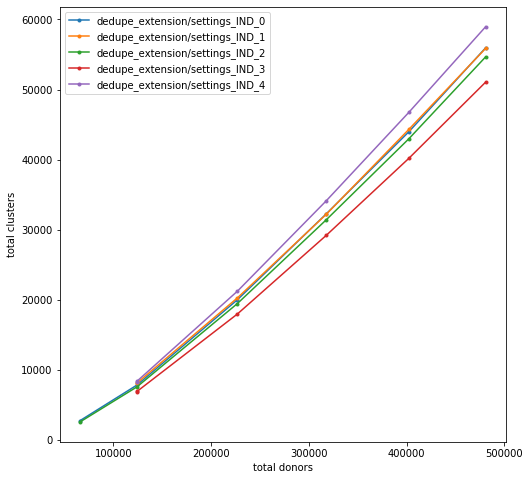

In [80]:
plt.figure(figsize=(8,8))
for s in total_clusters_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2])
plt.xlabel('total donors')
plt.ylabel('total clusters')
plt.legend()

In [36]:
settings_IND_4_clusters = pd.read_csv('settings_IND_4_biggest_ind_cluster_sizes.csv')
settings_IND_4_clusters.describe()

,cluster_size,cluster_id
count,191141.000000,191141.000000
mean,1.450416,449185.265103
std,0.908292,165963.851563
min,1.000000,19.000000
25%,1.000000,374183.000000
50%,1.000000,517068.000000
75%,2.000000,564853.000000
max,52.000000,612638.000000


In [37]:
num_single = settings_IND_4_clusters[settings_IND_4_clusters['cluster_size'] == 1].shape[0]

In [38]:
percent_single = num_single/settings_IND_4_clusters.shape[0]
percent_single

0.6914738334527913

(array([1.32169e+05, 4.31480e+04, 1.01830e+04, 3.17500e+03, 1.23500e+03,
        5.76000e+02, 2.54000e+02, 1.58000e+02, 8.10000e+01, 5.60000e+01,
        3.20000e+01, 1.40000e+01, 1.30000e+01, 1.30000e+01, 5.00000e+00,
        5.00000e+00, 7.00000e+00, 3.00000e+00, 3.00000e+00, 0.00000e+00,
        0.00000e+00, 5.00000e+00, 2.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00]),
 array([ 1.        ,  1.98076923,  2.96153846,  3.94230769,  4.92307692,
         5.90384615,  6.88461538,  7.86538462,  8.84615385,  9.82692308,
        10.80769231, 11.78846154, 12.76923077, 13.75      , 14.73076923,
        15.7115

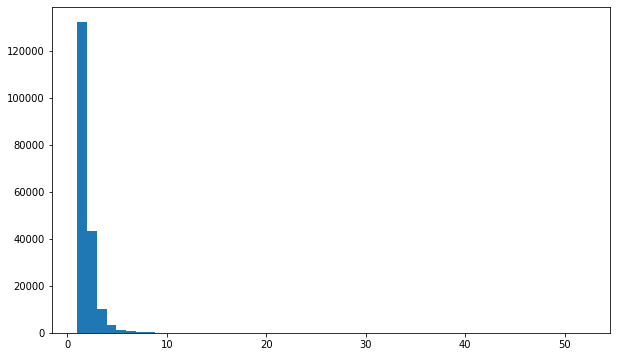

In [78]:
plt.figure(figsize=(10,6))
plt.hist(settings_IND_4_clusters['cluster_size'].values,bins=52)

In [40]:
settings_IND_4_non_single = settings_IND_4_clusters[settings_IND_4_clusters['cluster_size'] > 1]

In [41]:
settings_IND_4_non_single.describe()

,cluster_size,cluster_id
count,58972.000000,58972.000000
mean,2.459896,242986.733450
std,1.095561,138722.914471
min,2.000000,53.000000
25%,2.000000,123769.750000
50%,2.000000,241202.500000
75%,3.000000,363983.750000
max,52.000000,483450.000000


In [60]:
settings_IND_4_non_single_capped = settings_IND_4_non_single.copy()

In [67]:
settings_IND_4_non_single_capped['cluster_size']= settings_IND_4_non_single_capped['cluster_size'].apply(lambda x: x if x <=5 else 6 )

(array([43148., 10183.,  3175.,  2466.]),
 array([2., 3., 4., 5., 6.]),
 <a list of 4 Patch objects>)

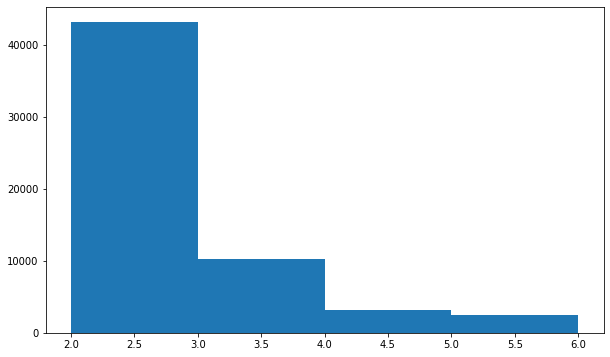

In [75]:
plt.figure(figsize=(10,6))
plt.hist(settings_IND_4_non_single_capped['cluster_size'].values,bins=4)

In [70]:
settings_IND_4_non_single_top = settings_IND_4_clusters[settings_IND_4_clusters['cluster_size'] > 5]

In [71]:
settings_IND_4_non_single_top.describe()

,cluster_size,cluster_id
count,1231.000000,1231.000000
mean,7.591389,235501.858652
std,2.958997,137878.332519
min,6.000000,61.000000
25%,6.000000,122591.500000
50%,7.000000,224206.000000
75%,8.000000,355542.000000
max,52.000000,482569.000000


(array([576., 254., 158.,  81.,  56.,  32.,  14.,  13.,  13.,   5.,   5.,
          7.,   3.,   3.,   0.,   0.,   5.,   2.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.]),
 array([ 6.        ,  6.9787234 ,  7.95744681,  8.93617021,  9.91489362,
        10.89361702, 11.87234043, 12.85106383, 13.82978723, 14.80851064,
        15.78723404, 16.76595745, 17.74468085, 18.72340426, 19.70212766,
        20.68085106, 21.65957447, 22.63829787, 23.61702128, 24.59574468,
        25.57446809, 26.55319149, 27.53191489, 28.5106383 , 29.4893617 ,
        30.46808511, 31.44680851, 32.42553191, 33.40425532, 34.38297872,
        35.36170213, 36.34042553, 37.31914894, 38.29787234, 39.27659574,
        40.25531915, 41.23404255, 42.21276596, 43.19148936, 44.17021277,
        45.14893617, 46.12765957, 47.10638298, 48.08510638, 49.06382979,
        50.04255319

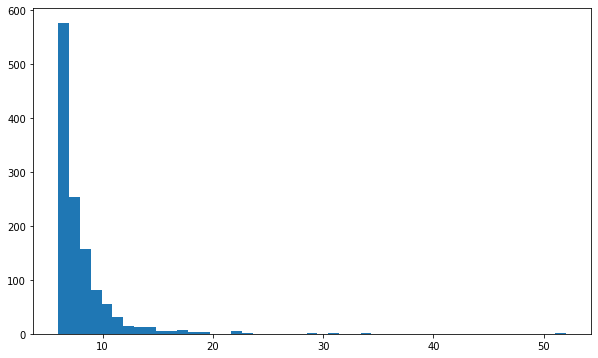

In [77]:
plt.figure(figsize=(10,6))
plt.hist(settings_IND_4_non_single_top['cluster_size'].values,bins=47)